In [21]:
# Add relevant Jupyter notebook extensions 
from __future__ import annotations
from dataclasses import dataclass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from terrain import generate_reference_and_limits

In [1]:
import sys
import os
sys.path.append('../uuv_mission')

from dynamic import Submarine, ClosedLoop, Mission
from control import PDController

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

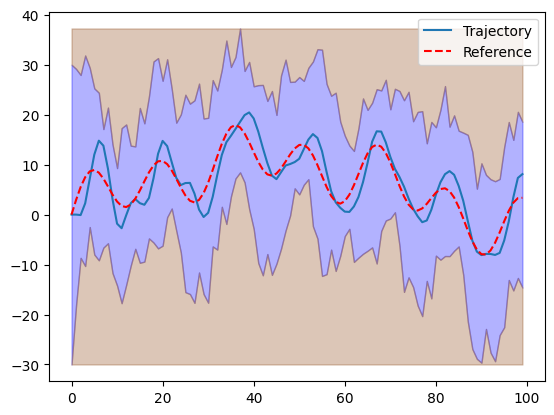

In [12]:
# Create the Submarine (UUV) instance
submarine = Submarine()

# Instantiate the PD controller with given gains
controller = PDController(Kp=0.15, Kd=0.6)

# Set up the closed-loop control system
closed_loop = ClosedLoop(plant=submarine, controller=controller)

# Load the mission data from the CSV file
mission = Mission.from_csv('../data/mission.csv')

# Simulate the UUV using random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission)

# Plot the UUV's trajectory alongside the reference and cave boundaries
trajectory.plot_completed_mission(mission)

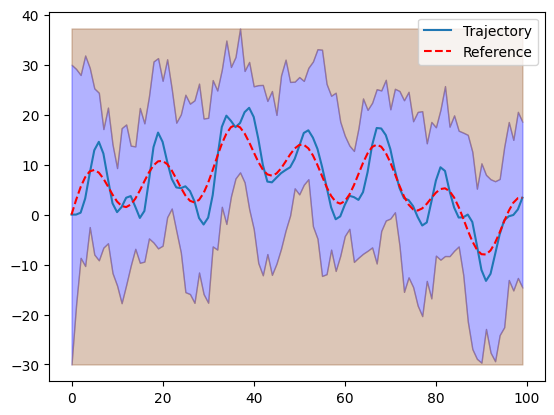

In [10]:
# adjust gain values (not necessary, trajectory is very close to reference, and does not touch seafloor anyway.)

controller = PDController(Kp=0.2, Kd=0.7)  # Adjust these values for tuning
closed_loop = ClosedLoop(plant=submarine, controller=controller)
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)


In [18]:
# keep Kp=0.15, Kd=0.6 for gain

controller = PDController(Kp=0.15, Kd=0.6)

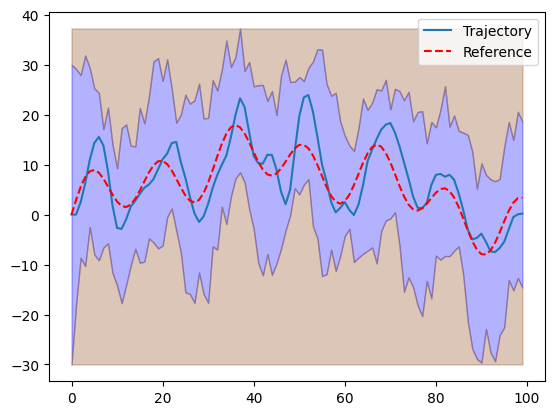

In [20]:
# Try with higher disturbance variance
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance=1.0)
trajectory.plot_completed_mission(mission)

# still safe, but closer to sea floor this time, and deviate more from reference. 